# Investigating The Relationship Between Wages and Performance of Elite Football Players #

The English [Premier League](https://www.premierleague.com/matchweek/5685/blog) is the top level of the English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation. 

Player data is now a huge business in the field of elite performance. Companies like [Opta](https://www.optasports.com/) provide data for 30 sports in 70 countries, with clients ranging from elite footbal leagues to broadcasters and betting websites. Performance metrics are now essential in elite level sport.

This of course makes access to such data very expensive, and unfortunately outside of the reach of this particular study! However we do have the next best thing - FIFA Stats. 

The popular football gaming series [FIFA](https://www.ea.com/games/fifa) is produced by the gaming company Electronic Arts. The series is updated yearly and is known for its accuracy of game mechanics and player atributes. So for this exercise they present a more easily accessible approximation for player data.

The data for this study was originally uploaded to [Kaggle](https://www.kaggle.com/karangadiya/fifa19/notebooks) in 2019, capturing data for the 2019 edition of FIFA.

GOAL.com have put together a comprehensive article on [how the FIFA team attain their metrics.](https://www.goal.com/en-gb/news/fifa-player-ratings-explained-how-are-the-card-number-stats/1hszd2fgr7wgf1n2b2yjdpgynu#:~:text=Each%20player%20in%20FIFA%20Ultimate,calculate%20the%20player's%20overall%20rating)

The data set is comprised of a vast number of stats relevant to how characters perform in-game. However for the purpose of this study we'll be focussing on the below variables:

- Name
- Age
- Overall
- Potential
- Club
- Value
- Wage

The `Overall` rating will be one of the key metrics we will review as this is the overarching metric based off all the other gathered stats, with the `Potential` metric describing what a given players maximum rating could be.



In [1]:
# importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in the data

fifa_df = pd.read_csv(r"C:\Users\thazzan\Documents\Python Scripts\Comparing Wages and Performance In The Premier League\FIFA 2019 dataset.csv")

fifa_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


**Data Cleaning**

To proceed with the analysis it will be necessary to remove some the variables that we'll definintely not require for this investigation. These will primarily be the metrics required to determine how a character behaves in-game.

Remove un-needed columns

Convert wage and salary values from `str` to `int`

Remove players valued below €1M

Convert the value column to `float`

Convert the wage column to `int`


In [3]:
# listing all columns in the dataset

for col in fifa_df.columns:
    print(col)

Unnamed: 0
ID
Name
Age
Photo
Nationality
Flag
Overall
Potential
Club
Club Logo
Value
Wage
Special
Preferred Foot
International Reputation
Weak Foot
Skill Moves
Work Rate
Body Type
Real Face
Position
Jersey Number
Joined
Loaned From
Contract Valid Until
Height
Weight
LS
ST
RS
LW
LF
CF
RF
RW
LAM
CAM
RAM
LM
LCM
CM
RCM
RM
LWB
LDM
CDM
RDM
RWB
LB
LCB
CB
RCB
RB
Crossing
Finishing
HeadingAccuracy
ShortPassing
Volleys
Dribbling
Curve
FKAccuracy
LongPassing
BallControl
Acceleration
SprintSpeed
Agility
Reactions
Balance
ShotPower
Jumping
Stamina
Strength
LongShots
Aggression
Interceptions
Positioning
Vision
Penalties
Composure
Marking
StandingTackle
SlidingTackle
GKDiving
GKHandling
GKKicking
GKPositioning
GKReflexes
Release Clause


Based on the above, we can select the columns that we will use to continue the study:

- Name
- Age
- Overall
- Potential
- Club
- Value
- Wage
- Work Rate

In [4]:
# Reducing `fifa_df` to the required columns

fifa_df = fifa_df[["Name", "Age", "Overall", "Potential", "Club", "Value", "Wage"]]

fifa_df


,Name,Age,Overall,Potential,Club,Value,Wage
0,L. Messi,31,94,94,FC Barcelona,€110.5M,€565K
1,Cristiano Ronaldo,33,94,94,Juventus,€77M,€405K
2,Neymar Jr,26,92,93,Paris Saint-Germain,€118.5M,€290K
3,De Gea,27,91,93,Manchester United,€72M,€260K
4,K. De Bruyne,27,91,92,Manchester City,€102M,€355K
...,...,...,...,...,...,...,...
18202,J. Lundstram,19,47,65,Crewe Alexandra,€60K,€1K
18203,N. Christoffersson,19,47,63,Trelleborgs FF,€60K,€1K
18204,B. Worman,16,47,67,Cambridge United,€60K,€1K
18205,D. Walker-Rice,17,47,66,Tranmere Rovers,€60K,€1K


In [5]:
# Adding Currency and Value to the `Value`and `Wage` columns

fifa_df.rename(columns = {"Wage": "Wage_€K", "Value": "Value_€M"}, inplace=True)

In [6]:
# Using a Boolean Mask to remove players valued below €1M by first filtering entries valued in thousands("K")

value_filter1 = fifa_df["Value_€M"].str.contains("K")

fifa_df = fifa_df[~value_filter1]

fifa_df


,Name,Age,Overall,Potential,Club,Value_€M,Wage_€K
0,L. Messi,31,94,94,FC Barcelona,€110.5M,€565K
1,Cristiano Ronaldo,33,94,94,Juventus,€77M,€405K
2,Neymar Jr,26,92,93,Paris Saint-Germain,€118.5M,€290K
3,De Gea,27,91,93,Manchester United,€72M,€260K
4,K. De Bruyne,27,91,92,Manchester City,€102M,€355K
...,...,...,...,...,...,...,...
17539,C. Singh,21,53,62,NaN,€0,€0
17672,R. Kawai,39,53,53,Hokkaido Consadole Sapporo,€0,€1K
17726,T. Warner,44,53,53,Accrington Stanley,€0,€1K
17752,S. Phillips,40,52,52,Yeovil Town,€0,€1K


In [7]:
# Removing the currency symbol and "K" string from the `Wage` column

fifa_df["Wage_€K"] = fifa_df["Wage_€K"].str.strip("€ K")

C:\Users\thazzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# Removing the currency symbol and "M" string from the `Value` column

fifa_df["Value_€M"] = fifa_df["Value_€M"].str.strip("€ M")

fifa_df

C:\Users\thazzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Age,Overall,Potential,Club,Value_€M,Wage_€K
0,L. Messi,31,94,94,FC Barcelona,110.5,565
1,Cristiano Ronaldo,33,94,94,Juventus,77,405
2,Neymar Jr,26,92,93,Paris Saint-Germain,118.5,290
3,De Gea,27,91,93,Manchester United,72,260
4,K. De Bruyne,27,91,92,Manchester City,102,355
...,...,...,...,...,...,...,...
17539,C. Singh,21,53,62,NaN,0,0
17672,R. Kawai,39,53,53,Hokkaido Consadole Sapporo,0,1
17726,T. Warner,44,53,53,Accrington Stanley,0,1
17752,S. Phillips,40,52,52,Yeovil Town,0,1


In [9]:
# Converting number characters to numerical values from strings

fifa_df["Value_€M"] = fifa_df["Value_€M"].astype(float)
fifa_df["Wage_€K"] = fifa_df["Wage_€K"].astype(int)
fifa_df["Age"] = fifa_df["Age"].astype(int)
fifa_df["Overall"] = fifa_df["Overall"].astype(int)
fifa_df["Potential"] = fifa_df["Potential"].astype(int)


C:\Users\thazzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\thazzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\thazzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [10]:
# Removing player values below €1 million, but not registered in the thousands

zero_values = fifa_df["Value_€M"] < 1.0

fifa_df = fifa_df[~zero_values]

fifa_df

,Name,Age,Overall,Potential,Club,Value_€M,Wage_€K
0,L. Messi,31,94,94,FC Barcelona,110.5,565
1,Cristiano Ronaldo,33,94,94,Juventus,77.0,405
2,Neymar Jr,26,92,93,Paris Saint-Germain,118.5,290
3,De Gea,27,91,93,Manchester United,72.0,260
4,K. De Bruyne,27,91,92,Manchester City,102.0,355
...,...,...,...,...,...,...,...
11323,S. Reyes,20,64,78,Monarcas Morelia,1.0,2
11457,W. Geubbels,16,64,86,AS Monaco,1.0,5
11566,Mayoral,21,64,79,AD Alcorcón,1.0,3
11682,D. James,20,64,79,Swansea City,1.0,5


In [11]:
# Creating a copy of the cleaned dataframe. This will prevent any further copy warning errors.

fifa_clean = fifa_df.copy()

**Assessing for correlations**

First let's group the variables that we want to assess for correlation. These will be the numeric columns

In [12]:
#Creating a dataframe of numeric variables

fifa_stats = fifa_clean[["Age", "Overall", "Potential", "Value_€M", "Wage_€K"]]

# It will now be possible to create a correlation matrix using this new dataframe

fifa_corr = fifa_stats.corr()

fifa_corr


,Age,Overall,Potential,Value_€M,Wage_€K
Age,1.000000,0.343643,-0.446009,0.017887,0.127657
Overall,0.343643,1.000000,0.575959,0.805520,0.696328
Potential,-0.446009,0.575959,1.000000,0.658618,0.504100
Value_€M,0.017887,0.805520,0.658618,1.000000,0.829303
Wage_€K,0.127657,0.696328,0.504100,0.829303,1.000000


The above table of correlations is a great place to start analysing our information. However we can better represent this chart using a heat map for a more visual and intuitive chart.

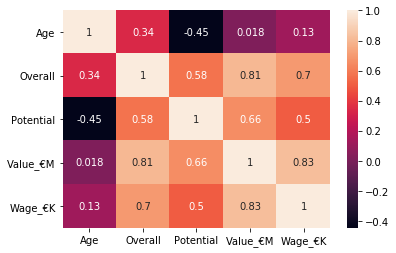

In [13]:
# Using Seaborn to generate a heatmap

sns.heatmap(fifa_corr, annot=True)
plt.show()

The heatmap makes the correlations much easier to intuit. As such we can see some interesting relationships.

There is a strong (0.6 or greater) positive correlation between: 
- Overall rating, Value and Wage
- Potential and Value

There are no strong (-0.6 or less) negative correlations between the data points.

Age and Wage have no correlation.

Potential and Wage appear to be weakly correlated.



## In Summary ##

When looking at the relationship between pay and performance, it can be argued that elite football players can be expected be higher rated, and therefore perform better when they have a higher wage.

There is also an argument that a higher transfer fee can increase the potential of a player to perform.

**Considerations**

While this study simply seeks to statisticly verify a relationship between Pay and Performance, there are a number of ways this study could be expanded.

- Comparissons of ratings before and after lucrative transfers
- Year by year comparissons of ratings
- Investigating outlier players - Does the presence of older high value players (Cristiano Ronaldo, Lionel Messi etc) bias the result?

Of course, a study like this can be greatly expanded with more in depth data points from a provider such as Opta. But hopefully this serves as an inspiration for anyone looking to take the matter further.